<a href="https://colab.research.google.com/github/Rahmat-Rizalwan/Deep_Learning_M3/blob/main/Rice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
mkdir -p /content/rice

In [1]:
cp /content/drive/MyDrive/Deep_Learning/Rice_Image_Dataset.zip /content

In [3]:
!unzip /content/Rice_Image_Dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (55).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (550).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5507).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5508).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5509).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (551).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5510).jpg  
  inflating: Rice_Image_Dataset/Karacadag/K

In [7]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/content/Rice_Image_Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/Rice_Image_Dataset/Arborio/Arborio (14981).jpg
/content/Rice_Image_Dataset/Arborio/Arborio (4008).jpg
/content/Rice_Image_Dataset/Arborio/Arborio (11951).jpg
/content/Rice_Image_Dataset/Arborio/Arborio (10010).jpg
/content/Rice_Image_Dataset/Arborio/Arborio (12555).jpg
/content/Rice_Image_Dataset/Arborio/Arborio (4294).jpg
/content/Rice_Image_Dataset/Arborio/Arborio (14960).jpg
/content/Rice_Image_Dataset/Arborio/Arborio (8943).jpg
/content/Rice_Image_Dataset/Arborio/Arborio (13569).jpg
/content/Rice_Image_Dataset/Arborio/Arborio (7146).jpg
/content/Rice_Image_Dataset/Arborio/Arborio (575).jpg
/content/Rice_Image_Dataset/Arborio/Arborio (2058).jpg
/content/Rice_Image_Dataset/Arborio/Arborio (12150).jpg
/content/Rice_Image_Dataset/Arborio/Arborio (2492).jpg
/content/Rice_Image_Dataset/Arborio/Arborio (14358).jpg
/content/Rice_Image_Dataset/Arborio/Arborio (14232).jpg
/content/Rice_Image_Dataset/Arborio/Arborio (14378).jpg
/cont

In [8]:
labels =os.listdir("../content/Rice_Image_Dataset")
labels.remove('Rice_Citation_Request.txt')
labels

['Jasmine', 'Ipsala', 'Basmati', 'Karacadag', 'Arborio']

(250, 250, 3)


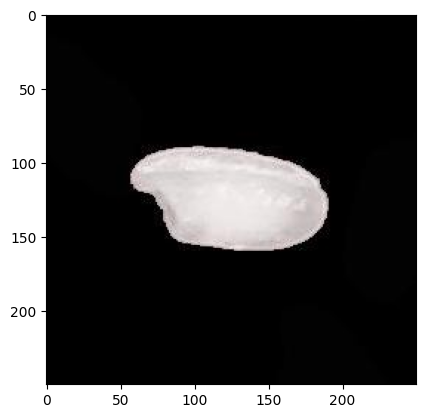

In [9]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("../content/Rice_Image_Dataset/Arborio/Arborio (1).jpg")
print(img.shape)
plt.imshow(img)

In [11]:
X=[]
y=[]
image_size=250
for i in labels:
    folder_path=os.path.join('../content/Rice_Image_Dataset',i)
    counter=0 #
    for j in os.listdir(folder_path):
        counter+=1 #
        img = cv2.imread(os.path.join(folder_path,j))
        img = cv2.resize(img,(image_size,image_size))
        X.append(img)
        y.append(labels.index(i))
        if counter==300:break
        
X = np.array(X)
X = X/255
y = np.array(y)
type(X)

numpy.ndarray

In [12]:
type(y)
y

array([0, 0, 0, ..., 4, 4, 4])

In [14]:
from sklearn.model_selection import train_test_split
import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [15]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val)

In [16]:
num_label = 5

model = keras.Sequential()
model.add(Conv2D(filters=8,kernel_size=3, padding='same', activation='relu', input_shape=(250,250,3)))
model.add(Dense(128, activation='relu'))
model.add(Conv2D(filters=16,kernel_size=5,padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=5,padding='same', activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Conv2D(filters=16,kernel_size=5,padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 8)       224       
                                                                 
 dense (Dense)               (None, 250, 250, 128)     1152      
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 250, 16)      51216     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 16)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 125, 125, 32)      12832     
                                                                 
 dense_1 (Dense)             (None, 125, 125, 512)     16896     
                                                        

In [17]:
model.compile(
  optimizer="adam",
  loss='sparse_categorical_crossentropy',
  metrics=['acc'])

In [18]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
36/36 [==============================] - 60s 900ms/step - loss: 0.9734 - acc: 0.5840 - val_loss: 0.3827 - val_acc: 0.8830
Epoch 2/5
36/36 [==============================] - 19s 524ms/step - loss: 0.3645 - acc: 0.8907 - val_loss: 0.3907 - val_acc: 0.8723
Epoch 3/5
36/36 [==============================] - 19s 525ms/step - loss: 0.3370 - acc: 0.8978 - val_loss: 0.3242 - val_acc: 0.8830
Epoch 4/5
36/36 [==============================] - 19s 524ms/step - loss: 0.2320 - acc: 0.9324 - val_loss: 0.3407 - val_acc: 0.8936
Epoch 5/5
36/36 [==============================] - 19s 526ms/step - loss: 0.1178 - acc: 0.9600 - val_loss: 0.3211 - val_acc: 0.9149


In [19]:
model.evaluate(X_test,y_test)

9/9 [==============================] - 6s 735ms/step - loss: 0.3600 - acc: 0.9217


[0.36004599928855896, 0.9217081665992737]

In [20]:
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import pandas as pd

init_notebook_mode(connected=True)

acc = pd.DataFrame({'train': history.history['acc'], 'val': history.history['val_acc']})

fig = px.line(acc, x=acc.index, y=acc.columns[0::], title='Training and Evaluation Accuracy every Epoch', markers=True)
fig.show()